In [2]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import find_peaks

# ✅ 只改这两个参数
start_index = 700
end_index = 731
range_tag = f"{start_index}-{end_index}"

BASE_PATH = "/content/drive/MyDrive/Cluster-proj"
LOGITS_PATH = f"{BASE_PATH}/output/llm_steps/whole_logits/deepseek7b-gsm-{range_tag}.json"
ERROR_INDEX_PATH = f"{BASE_PATH}/output/error_index/{range_tag}_sentence_with_index.json"

from google.colab import drive
drive.mount('/content/drive')

# ✅ 读取数据
with open(LOGITS_PATH, "r") as f:
    logits_data = json.load(f)

with open(ERROR_INDEX_PATH, "r") as f:
    error_index_data = json.load(f)

# ✅ 自动生成所有 (q_id, sampling_id)
samples_to_plot = []
for qid, sample_data in error_index_data.items():
    for sampling_id in sample_data.keys():
        samples_to_plot.append((qid, sampling_id))

print(f"✅ 共找到 {len(samples_to_plot)} 个 (q_id, sampling_id)，准备绘制并保存。")

# ✅ PDF 输出路径
pdf_path = f"{BASE_PATH}/output/error_index/{range_tag}_entropy_peaks_span.pdf"
os.makedirs(os.path.dirname(pdf_path), exist_ok=True)

with PdfPages(pdf_path) as pdf:
    for group_start in range(0, len(samples_to_plot), 10):
        group = samples_to_plot[group_start: group_start + 10]
        plt.figure(figsize=(20, 20))

        for i, (q_id, sampling_id) in enumerate(group):
            token_probs = logits_data[q_id][sampling_id]["token_probs"]
            entropies = [entry["topk_info"]["entropy"] for entry in token_probs]
            tokens = [entry["token"] for entry in token_probs]

            error_info = error_index_data[q_id][sampling_id]
            start_error_idx = error_info.get("first_error_token_index", -1)
            end_error_idx = error_info.get("last_error_token_index", -1)

            # ✅ 拟合方式找峰值
            peaks, _ = find_peaks(entropies, height=0.3)

            ax = plt.subplot(5, 2, i + 1)
            ax.plot(range(len(entropies)), entropies, marker='o', linestyle='-', alpha=0.7, label='Entropy')
            ax.set_title(f"{q_id} / {sampling_id}")
            ax.set_xlabel("Token Index")
            ax.set_ylabel("Entropy")
            ax.grid(True)

            # ✅ 横坐标标注（避免过密）
            skip = max(len(tokens) // 30, 1)
            xticks = range(0, len(tokens), skip)
            ax.set_xticks(xticks)
            ax.set_xticklabels([tokens[i] for i in xticks], rotation=45, ha='right', fontsize=6)

            # ✅ 标注每个点 index
            for idx, ent in enumerate(entropies):
                ax.annotate(str(idx), (idx, ent), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6, color='red')

            # ✅ 竖线标记峰值
            for peak_idx in peaks:
                ax.axvline(x=peak_idx, color='blue', linestyle='--', alpha=0.6)

            # ✅ 高亮 error span
            if start_error_idx != -1 and end_error_idx != -1:
                ax.axvspan(start_error_idx, end_error_idx, color='red', alpha=0.2, label="Error Span")

        plt.tight_layout()
        pdf.savefig()
        plt.close()

print(f"✅ 已保存 PDF 至：{pdf_path}")


Mounted at /content/drive
✅ 共找到 40 个 (q_id, sampling_id)，准备绘制并保存。


<ipython-input-2-1644403550>:80: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-1644403550>:81: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-2-1644403550>:80: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-1644403550>:81: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-2-1644403550>:80: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-1644403550>:81: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-2-1644403550>:80: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input

✅ 已保存 PDF 至：/content/drive/MyDrive/Cluster-proj/output/error_index/700-731_entropy_peaks_span.pdf


In [3]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import find_peaks

# ✅ 配置参数
start_index = 700
end_index = 731
range_tag = f"{start_index}-{end_index}"

BASE_PATH = "/content/drive/MyDrive/Cluster-proj"
LOGITS_PATH = f"{BASE_PATH}/output/llm_steps/whole_logits/deepseek7b-gsm-{range_tag}.json"
ERROR_INDEX_PATH = f"{BASE_PATH}/output/error_index/{range_tag}_sentence_with_index.json"
PDF_PATH = f"{BASE_PATH}/output/error_index/{range_tag}_entropy_peaks_span_param.pdf"

# ✅ 可调节的 find_peaks 参数
FIND_PEAKS_PARAMS = {
    "height": 0.3,
    "prominence": 0.15,
    "distance": 3
}

# ✅ 加载数据
with open(LOGITS_PATH, "r") as f:
    logits_data = json.load(f)
with open(ERROR_INDEX_PATH, "r") as f:
    error_index_data = json.load(f)

# ✅ 收集所有 (qid, sampling_id) 组合
samples_to_plot = []
for qid, sample_data in error_index_data.items():
    for sampling_id in sample_data.keys():
        samples_to_plot.append((qid, sampling_id))

print(f"✅ 总共 {len(samples_to_plot)} 个样本，开始绘图并写入 PDF：{PDF_PATH}")
os.makedirs(os.path.dirname(PDF_PATH), exist_ok=True)

# ✅ 写入 PDF（每页 10 个图）
with PdfPages(PDF_PATH) as pdf:
    for group_start in range(0, len(samples_to_plot), 10):
        group = samples_to_plot[group_start: group_start + 10]
        plt.figure(figsize=(20, 20))

        for i, (q_id, sampling_id) in enumerate(group):
            token_probs = logits_data[q_id][sampling_id]["token_probs"]
            entropies = [entry["topk_info"]["entropy"] for entry in token_probs]
            tokens = [entry["token"] for entry in token_probs]

            error_info = error_index_data[q_id][sampling_id]
            start_error_idx = error_info.get("first_error_token_index", -1)
            end_error_idx = error_info.get("last_error_token_index", -1)

            # ✅ 使用 find_peaks 拟合
            peaks, _ = find_peaks(entropies, **FIND_PEAKS_PARAMS)

            ax = plt.subplot(5, 2, i + 1)
            ax.plot(range(len(entropies)), entropies, marker='o', linestyle='-', alpha=0.7, label="Entropy")
            ax.set_title(f"{q_id} / {sampling_id}")
            ax.set_xlabel("Token Index")
            ax.set_ylabel("Entropy")
            ax.grid(True)

            # ✅ 横坐标标注 token（避免太密）
            skip = max(len(tokens) // 30, 1)
            xticks = range(0, len(tokens), skip)
            ax.set_xticks(xticks)
            ax.set_xticklabels([tokens[i] for i in xticks], rotation=45, ha='right', fontsize=6)

            # ✅ 注释 index
            for idx, ent in enumerate(entropies):
                ax.annotate(str(idx), (idx, ent), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=6)

            # ✅ 标注峰值
            for peak_idx in peaks:
                ax.axvline(x=peak_idx, color='blue', linestyle='--', alpha=0.6)

            # ✅ 错误 span
            if start_error_idx != -1 and end_error_idx != -1:
                ax.axvspan(start_error_idx, end_error_idx, color='red', alpha=0.3, label="Error Span")

        plt.tight_layout()
        pdf.savefig()
        plt.close()

print(f"✅ PDF 保存完成：{PDF_PATH}")


✅ 总共 40 个样本，开始绘图并写入 PDF：/content/drive/MyDrive/Cluster-proj/output/error_index/700-731_entropy_peaks_span_param.pdf


<ipython-input-3-1752761693>:82: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-1752761693>:83: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-3-1752761693>:82: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-1752761693>:83: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-3-1752761693>:82: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-1752761693>:83: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  pdf.savefig()
<ipython-input-3-1752761693>:82: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input

✅ PDF 保存完成：/content/drive/MyDrive/Cluster-proj/output/error_index/700-731_entropy_peaks_span_param.pdf


Mounted at /content/drive


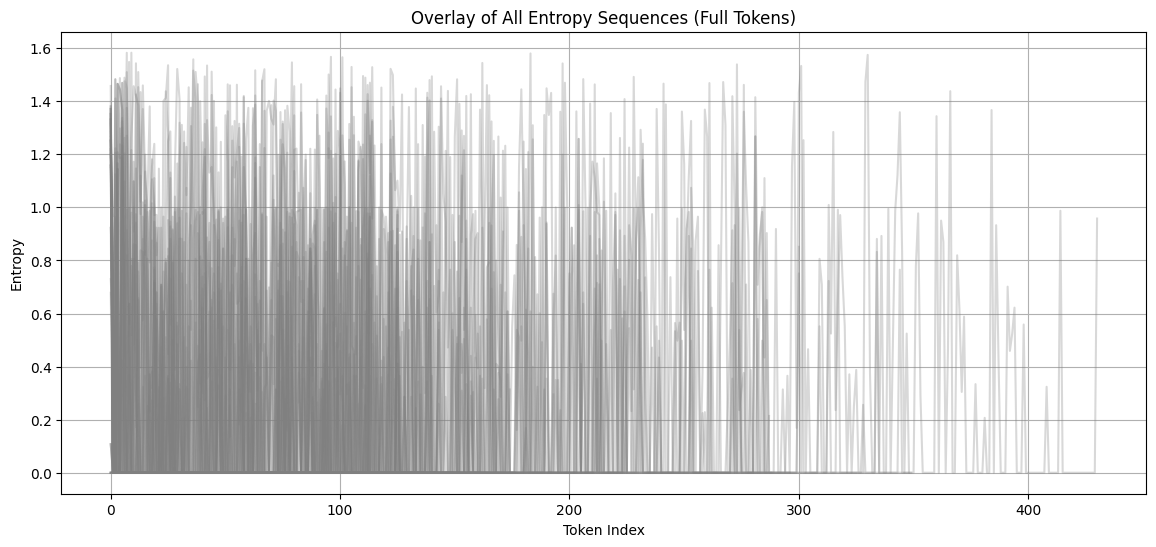

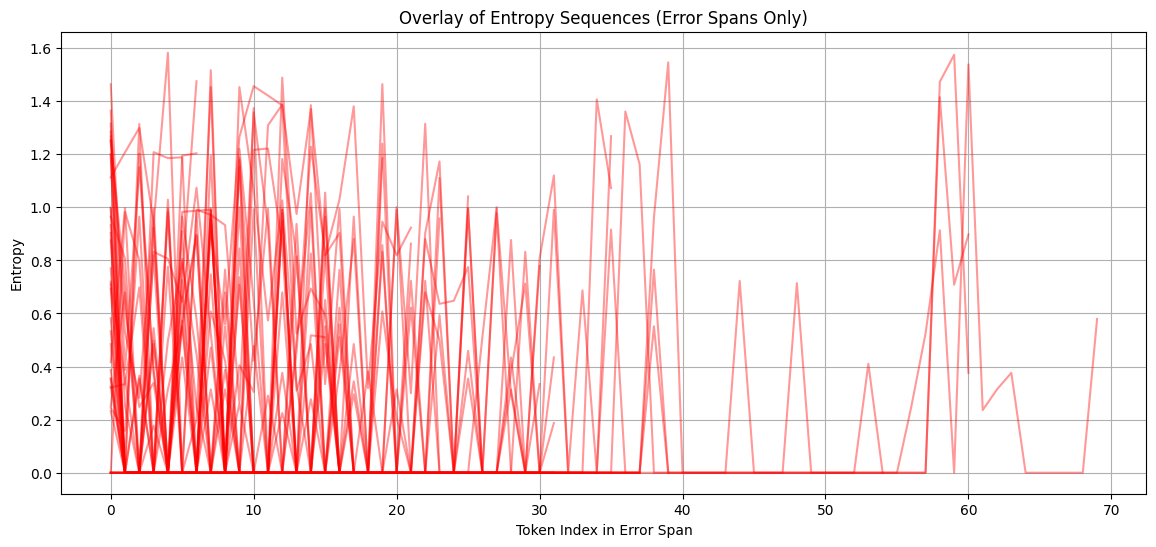

In [2]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# ✅ 参数配置
start_index = 700
end_index = 731
range_tag = f"{start_index}-{end_index}"

BASE_PATH = "/content/drive/MyDrive/Cluster-proj"
LOGITS_PATH = f"{BASE_PATH}/output/llm_steps/whole_logits/deepseek7b-gsm-{range_tag}.json"
ERROR_INDEX_PATH = f"{BASE_PATH}/output/error_index/{range_tag}_sentence_with_index.json"

# ✅ 挂载 Google Drive
drive.mount('/content/drive')

# ✅ 读取数据
with open(LOGITS_PATH, "r") as f:
    logits_data = json.load(f)
with open(ERROR_INDEX_PATH, "r") as f:
    error_index_data = json.load(f)

# ✅ 收集所有样本的 entropy 序列（原始 & 错误部分）
all_entropies = []
error_span_entropies = []

for qid, sample in error_index_data.items():
    for sid in sample:
        token_probs = logits_data[qid][sid]["token_probs"]
        error_info = sample[sid]
        start = error_info.get("first_error_token_index", -1)
        end = error_info.get("last_error_token_index", -1)

        entropies = []
        for token_info in token_probs:
            if "topk_info" in token_info and "entropy" in token_info["topk_info"]:
                entropies.append(token_info["topk_info"]["entropy"])

        all_entropies.append(entropies)

        if start != -1 and end != -1:
            span = []
            for idx in range(start, end + 1):
                if idx < len(token_probs):
                    entry = token_probs[idx]
                    if "topk_info" in entry and "entropy" in entry["topk_info"]:
                        span.append(entry["topk_info"]["entropy"])
            if span:
                error_span_entropies.append(span)

# ✅ 对齐长度：padding 到最长序列
def pad_sequences(sequences, pad_value=np.nan):
    max_len = max(len(seq) for seq in sequences)
    padded = np.array([seq + [pad_value] * (max_len - len(seq)) for seq in sequences])
    return padded

padded_all = pad_sequences(all_entropies)
padded_error = pad_sequences(error_span_entropies)

# ✅ 绘图：所有 entropy 曲线叠加
plt.figure(figsize=(14, 6))
for row in padded_all:
    plt.plot(row, color='gray', alpha=0.3)
plt.title("Overlay of All Entropy Sequences (Full Tokens)")
plt.xlabel("Token Index")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

# ✅ 绘图：仅错误 span 的 entropy 曲线叠加
plt.figure(figsize=(14, 6))
for row in padded_error:
    plt.plot(row, color='red', alpha=0.4)
plt.title("Overlay of Entropy Sequences (Error Spans Only)")
plt.xlabel("Token Index in Error Span")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()


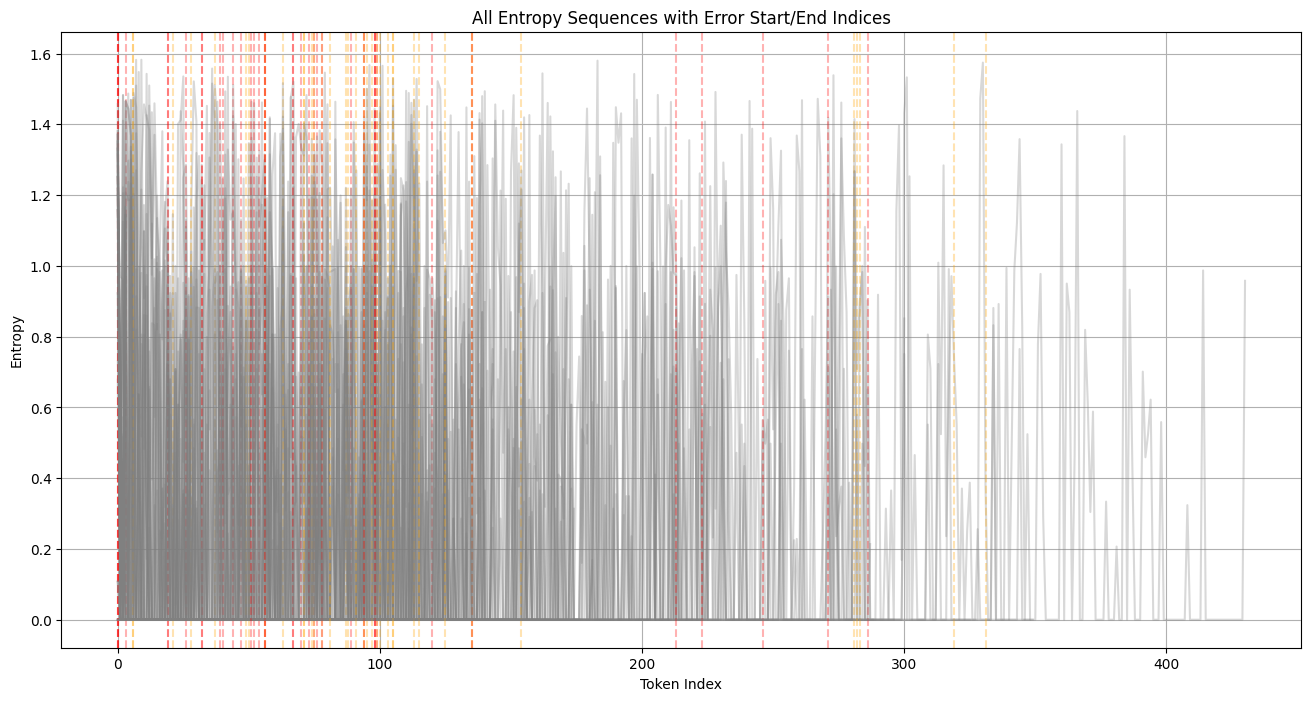

In [3]:
all_entropies = []
all_start_indices = []
all_end_indices = []

for qid, sample in error_index_data.items():
    for sid in sample:
        token_probs = logits_data[qid][sid]["token_probs"]
        error_info = sample[sid]
        start = error_info.get("first_error_token_index", -1)
        end = error_info.get("last_error_token_index", -1)

        entropies = []
        for token_info in token_probs:
            if "topk_info" in token_info and "entropy" in token_info["topk_info"]:
                entropies.append(token_info["topk_info"]["entropy"])

        if len(entropies) > 0:
            all_entropies.append(entropies)
            all_start_indices.append(start)
            all_end_indices.append(end)

# ✅ 绘图：完整曲线叠加 + error 起止位置
plt.figure(figsize=(16, 8))

for i, entropy_seq in enumerate(all_entropies):
    x = np.arange(len(entropy_seq))
    plt.plot(x, entropy_seq, color='gray', alpha=0.3)

    start = all_start_indices[i]
    end = all_end_indices[i]

    if 0 <= start < len(entropy_seq):
        plt.axvline(x=start, color='red', linestyle='--', alpha=0.3)
    if 0 <= end < len(entropy_seq):
        plt.axvline(x=end, color='orange', linestyle='--', alpha=0.3)

plt.title("All Entropy Sequences with Error Start/End Indices")
plt.xlabel("Token Index")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()

<ipython-input-5-2437136627>:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('rainbow')


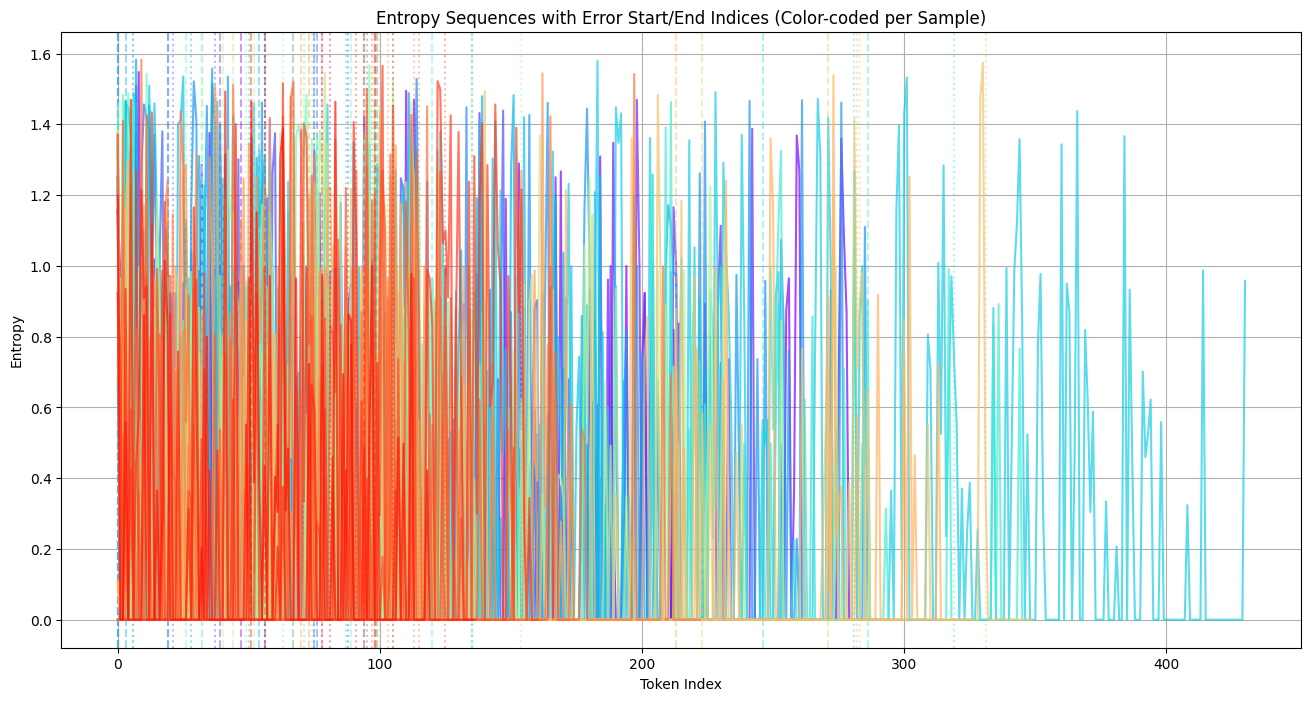

In [5]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from google.colab import drive

all_entropies = []
all_start_indices = []
all_end_indices = []

for qid, sample in error_index_data.items():
    for sid in sample:
        token_probs = logits_data[qid][sid]["token_probs"]
        error_info = sample[sid]
        start = error_info.get("first_error_token_index", -1)
        end = error_info.get("last_error_token_index", -1)

        entropies = []
        for token_info in token_probs:
            if "topk_info" in token_info and "entropy" in token_info["topk_info"]:
                entropies.append(token_info["topk_info"]["entropy"])

        if len(entropies) > 0:
            all_entropies.append(entropies)
            all_start_indices.append(start)
            all_end_indices.append(end)

# ✅ 获取颜色映射（每个样本一种颜色）
cmap = get_cmap('rainbow')
num_samples = len(all_entropies)
colors = [cmap(i / num_samples) for i in range(num_samples)]

# ✅ 绘图
plt.figure(figsize=(16, 8))

for i, entropy_seq in enumerate(all_entropies):
    x = np.arange(len(entropy_seq))
    color = colors[i]
    plt.plot(x, entropy_seq, color=color, alpha=0.7, label=f"Sample {i+1}")

    # 标注 start / end
    start = all_start_indices[i]
    end = all_end_indices[i]
    if 0 <= start < len(entropy_seq):
        plt.axvline(x=start, color=color, linestyle='--', alpha=0.4)
    if 0 <= end < len(entropy_seq):
        plt.axvline(x=end, color=color, linestyle=':', alpha=0.4)

plt.title("Entropy Sequences with Error Start/End Indices (Color-coded per Sample)")
plt.xlabel("Token Index")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()